# Example 3: The `mm2SANS` `Experiment` class

Calculate and plot the neutron scattering cross sections. Uses the settings specified in the `Sample` and `Probe` objects.

In [1]:
import mm2SANS
import numpy as np

In [2]:
""" create the Sample object (using settings from Example 1)"""
sample = mm2SANS.Sample(
    positions=[[0, 0, 0]],
    moments=[[0, 0, 1]],
    scattering_length_density=(8.024-0.001j),
    saturation_magnetisation=800e3,
    voxel_volumes= 4/3 * np.pi * 10e-9**3 ,
    periodicity=(50e-9, 50e-9, 50e-9),
    print_diagnostics=True,
    )

""" create a Detector object (using Settings from Example 2) """
print()
probe = mm2SANS.Probe(
                  sans_instrument='test'
                , neutron_wavelength=6e-10 # in m
                , detector_distance=15 # in m
                , neutron_polarisation=(0,0,1)
                , qmap_disorder=0.35 # to avoid Fourier transform artefacts
               )
probe.Beamline.print_beamline_settings()

""" create an Experiment object and calculate the scattering patterns """
experiment = mm2SANS.Experiment(sample, probe, print_diagnostics=False)
experiment.calc_scattering_pattern(uc_repetitions=(1,1,1), print_diagnostics=False)
print('\nscattering patterns calculated!')

Data bounding box size: (0.0, 0.0, 0.0) nm.
REMARK: Voxel volumes were not corrected.
1 positions with an average sphere diameter of 20.00 nm, and an average moment of 1.2e+05 mu_Bohr.

Neutron wavelength = 6.0 Angstrom, detector distance = 15 m
Neutron polarisation set to [0. 0. 1.] in sample environment coordinate system (u, v, w), 

scattering patterns calculated!


In [3]:
""" The calcualted patterns are stored in a pandas Dataframe """
experiment.data.head()

,q_U,q_V,q_W,q_phi,q_abs,sld_struct,sld_mag_U,sld_mag_V,sld_mag_W,I_pp,I_pm,I_mp,I_mm,I_m,I_p,I_sum,I_dif,asym
0,0.0,-3.279993e+08,-3.273456e+08,45.057146,4.633991e+08,(-0.153369317888801+1.9113823266301225e-05j),0j,(-0.237170201378092+0j),(0.23764377446720789+0j),0.007102,0.056250,0.056250,0.152891,0.209141,0.063352,0.272493,-0.145789,-0.535020
1,0.0,-3.275223e+08,-3.172074e+08,45.916588,4.559511e+08,(-0.07466244638001275+9.304891124129207e-06j),0j,(-0.23704929044476666+0j),(0.24475764537451447+0j),0.028932,0.056192,0.056192,0.102029,0.158222,0.085125,0.243346,-0.073097,-0.300382
2,0.0,-3.290999e+08,-3.052907e+08,47.149357,4.488977e+08,(0.0051683584350431504-6.441124669794554e-07j),0j,(-0.2365034685819089+0j),(0.2549481194942424+0j),0.067661,0.055934,0.055934,0.062390,0.118324,0.123594,0.241918,0.005271,0.021787
3,0.0,-3.294786e+08,-2.970386e+08,47.964033,4.436081e+08,(0.0684185966973143-8.526744354101983e-06j),0j,(-0.23590236659548114+0j),(0.2616656049869285+0j),0.108956,0.055650,0.055650,0.037344,0.092994,0.164606,0.257600,0.071611,0.277994
4,0.0,-3.271980e+08,-2.879599e+08,48.649685,4.358663e+08,(0.166205601108031-2.071355946012351e-05j),0j,(-0.23524860363826552+0j),(0.2673040887934099+0j),0.187931,0.055342,0.055342,0.010221,0.065563,0.243273,0.308835,0.177710,0.575419


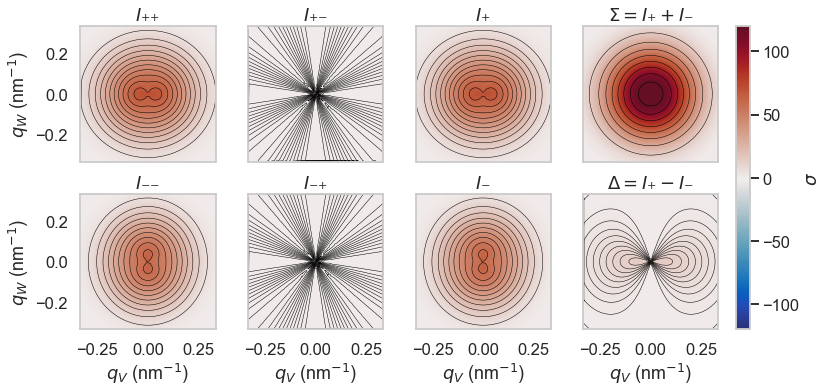

In [4]:
""" plot all scattering cross sections """
experiment.plot_scattering_patterns()

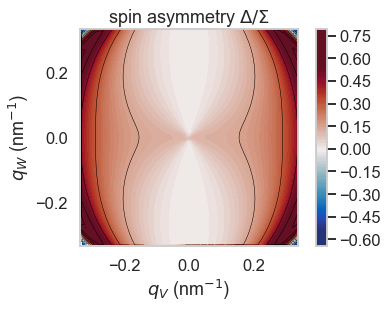

In [5]:
""" 
Plot a specific property from the data output only, e.g. I_pp, I_pm, I_mp, I_mm, I_m, I_p, I_sum, I_dif, asym
This function can be used to plot onto specific axes of a custom display layout (ax and title keywords).
"""
experiment.plot_property('asym', plot_imag=False, contours=True)

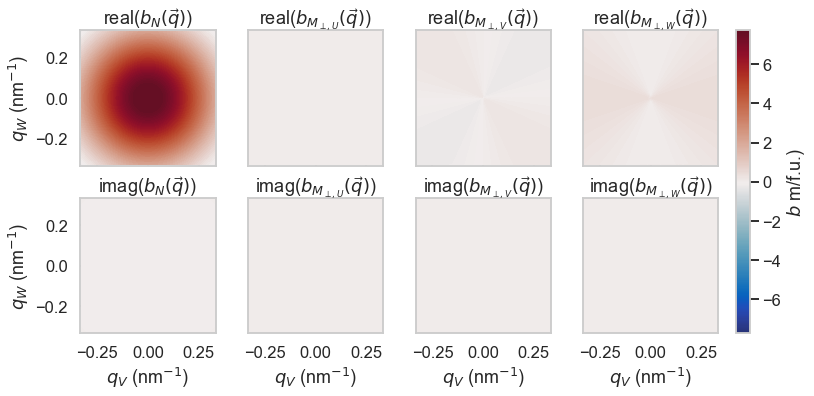

In [6]:
""" plot structural and magnetic scattering length components in reciprocal space """
experiment.plot_scattering_lengths()

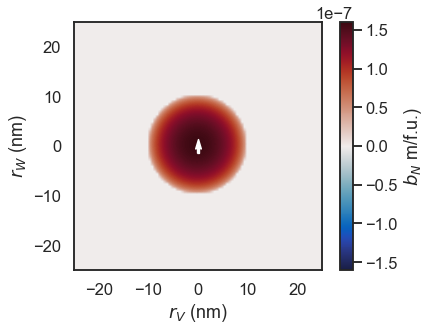

In [7]:
""" plot real value of the scattering length of sample transformed into the beamline coordinate system U, V, W """
experiment.Sample.plot_scattering_length(plane='VW', step_size=0.5e-9, show_magnetic=True)

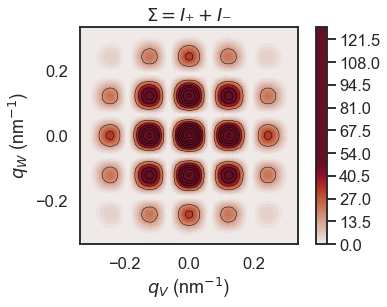

In [8]:
""" (brute-force) calculation scattering pattern for a periodic repetition (usually onyl a few are needed) """
# use with caution, result is very dependent on number of repetitions!
experiment.calc_scattering_pattern(uc_repetitions=(2,2,2), print_diagnostics=False)
experiment.plot_property('I_sum')